In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
# Global set-up
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['axes.grid'] = True
sns.set_style("whitegrid")

In [4]:
from data.utils import get_datetime_dataframe
df = get_datetime_dataframe()

No handles with labels found to put in legend.


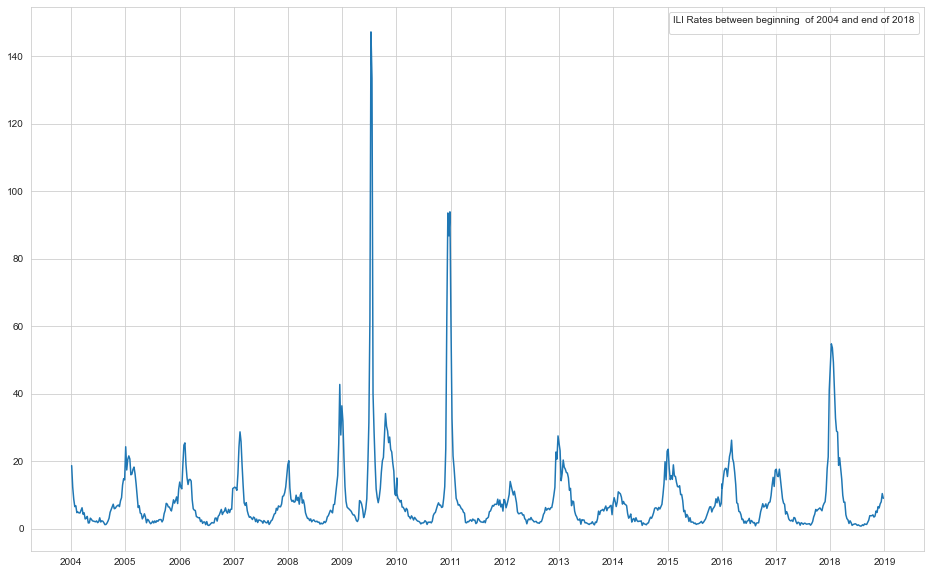

In [5]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(df['year week'], df['Disease Rate'])
ax.xaxis.set_major_locator(mdates.YearLocator(base = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.legend(title="ILI Rates between beginning  of 2004 and end of 2018", loc="upper right")
plt.show()

In [6]:
# EXAMPLE ON HOW TO USE OUR CUSTOM MODULES
from models.baseline_model import create_baseline

In [7]:
df_with_1week_baseline = create_baseline(df, 1)
df_with_2week_baseline = create_baseline(df, 2)
df_with_3week_baseline = create_baseline(df, 3)
df_with_4week_baseline = create_baseline(df, 4)

In [18]:
def plot_multiple_in_year_range(data, *additional_data, year_range=[2004, 2018], labels=[]):
    year_range_query = 'year >= ' + str(year_range[0]) + ' and year <= ' + str(year_range[1])

    fig, ax = plt.subplots(figsize=(10, 10))

    data.query(year_range_query).plot(x='year week', y='Disease Rate', x_compat=True, ax=ax)
    for d in additional_data:
        d.query(year_range_query).plot(x='year week', y='Predicted Rate', x_compat=True, ax=ax)
        
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval = 3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    ax.set_xlabel('Months (' + str(year_range[0]) + '-' + str(year_range[1]) + ')', fontsize = 18)
    ax.set_ylabel('ILI Rate', fontsize = 18)

    plt.legend(labels=labels, loc="upper right", fontsize=18)
    plt.show()

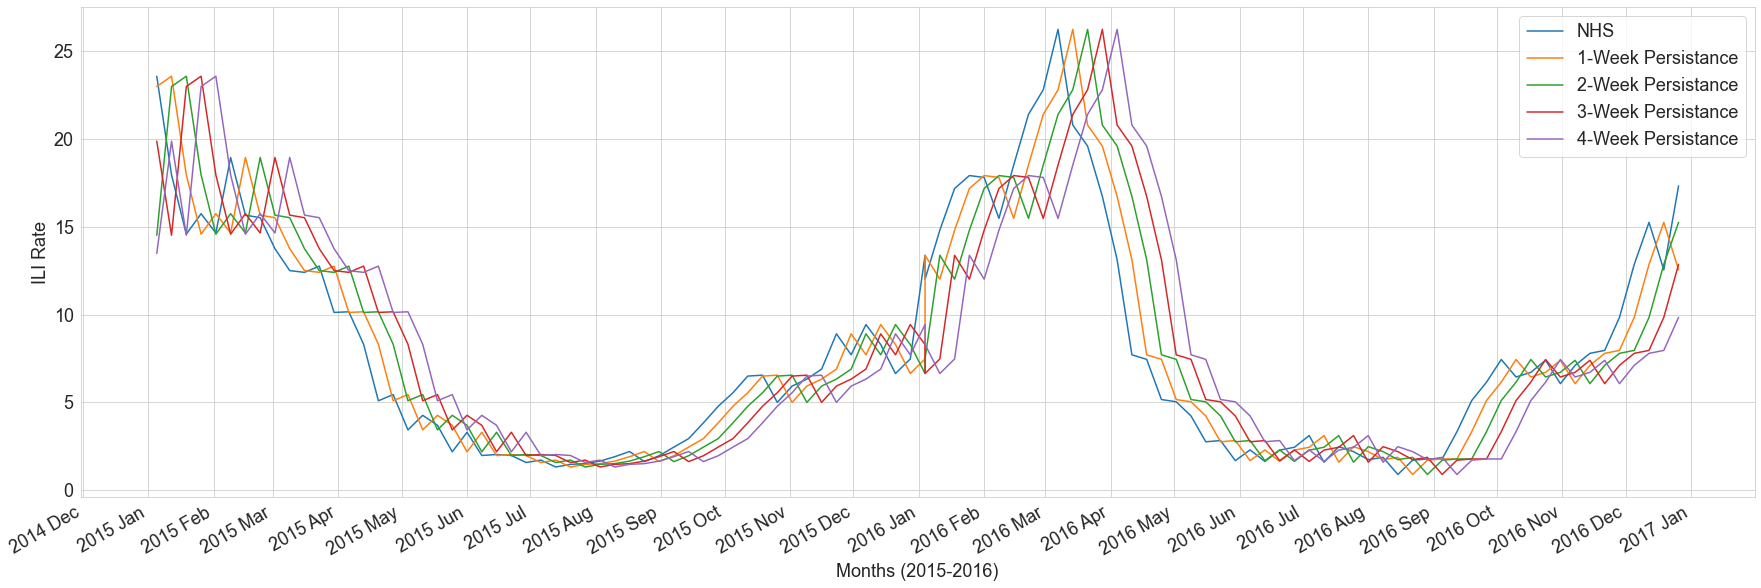

In [9]:
plot_multiple_in_year_range(df, df_with_1week_baseline, df_with_2week_baseline, 
                            df_with_3week_baseline, df_with_4week_baseline,
                            year_range=[2015, 2016],
                            labels=["NHS","1-Week Persistance", "2-Week Persistance", "3-Week Persistance", "4-Week Persistance"]
                           )

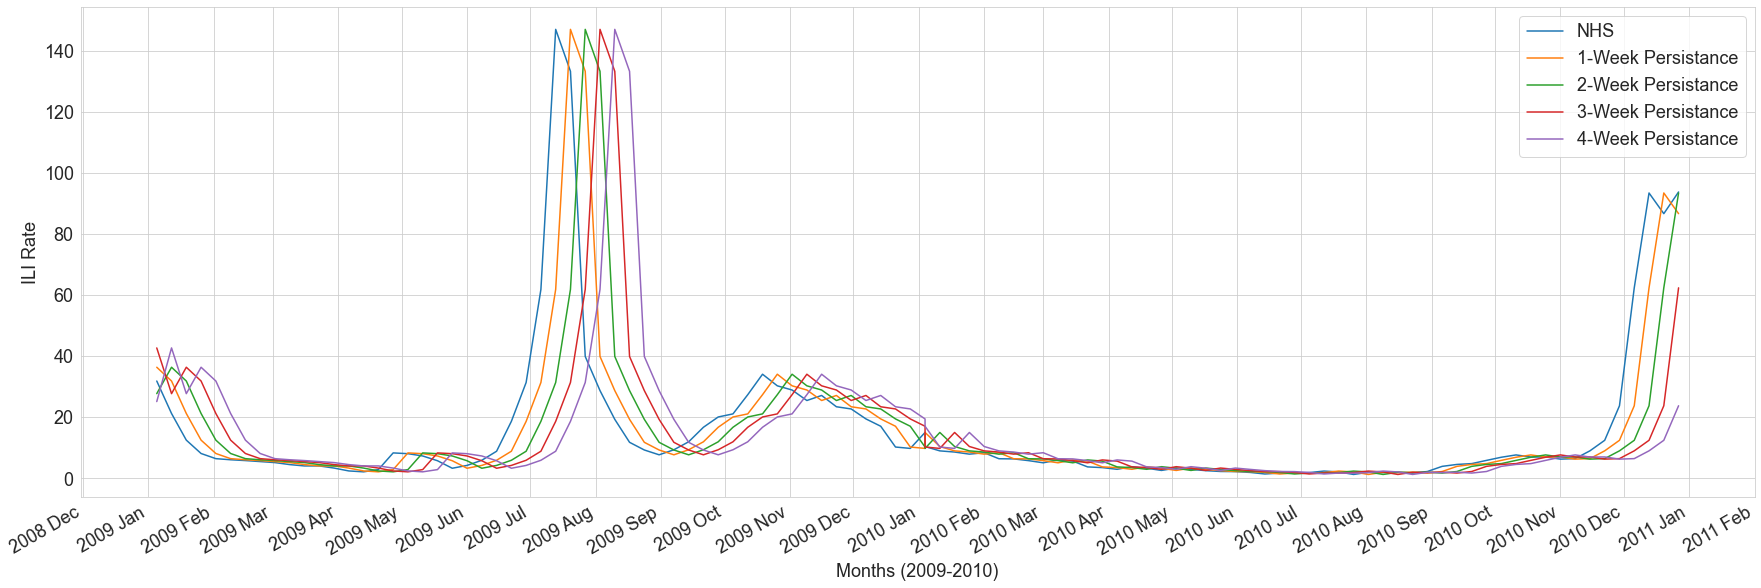

In [10]:
plot_multiple_in_year_range(df, df_with_1week_baseline, df_with_2week_baseline, 
                            df_with_3week_baseline, df_with_4week_baseline,
                            year_range=[2009, 2010],
                            labels=["NHS","1-Week Persistance", "2-Week Persistance", "3-Week Persistance", "4-Week Persistance"]
                           )

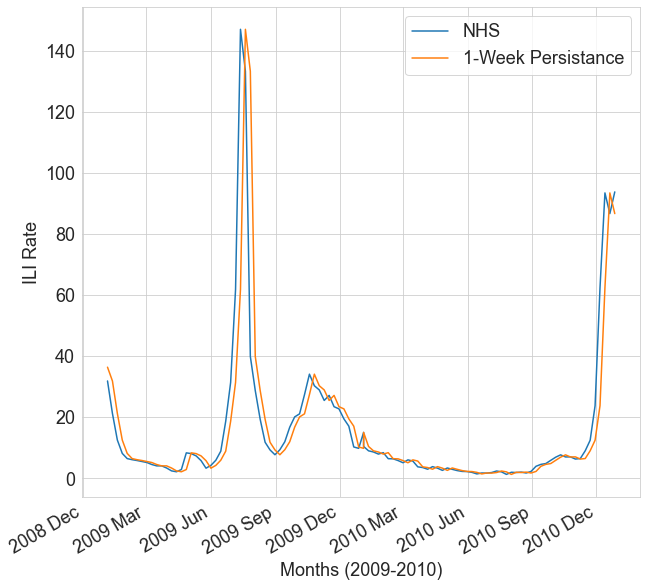

In [19]:
plot_multiple_in_year_range(df, df_with_1week_baseline,
                            year_range=[2009, 2010],
                            labels=["NHS","1-Week Persistance"]
                           )

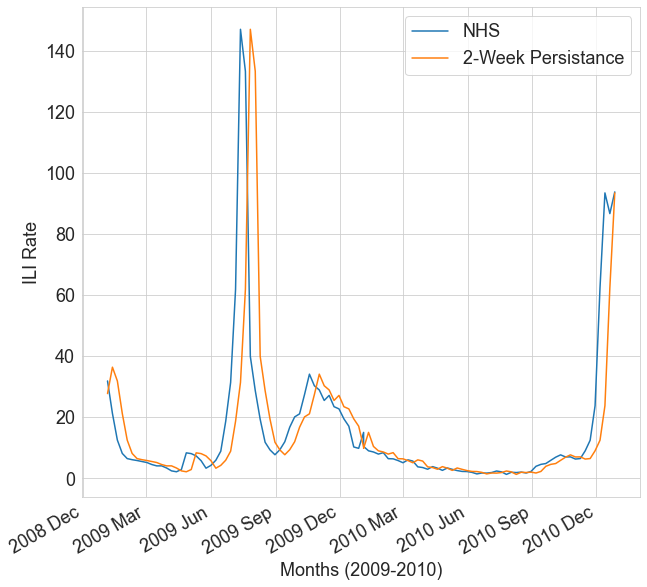

In [21]:
plot_multiple_in_year_range(df, df_with_2week_baseline,
                            year_range=[2009, 2010],
                            labels=["NHS","2-Week Persistance"]
                           )

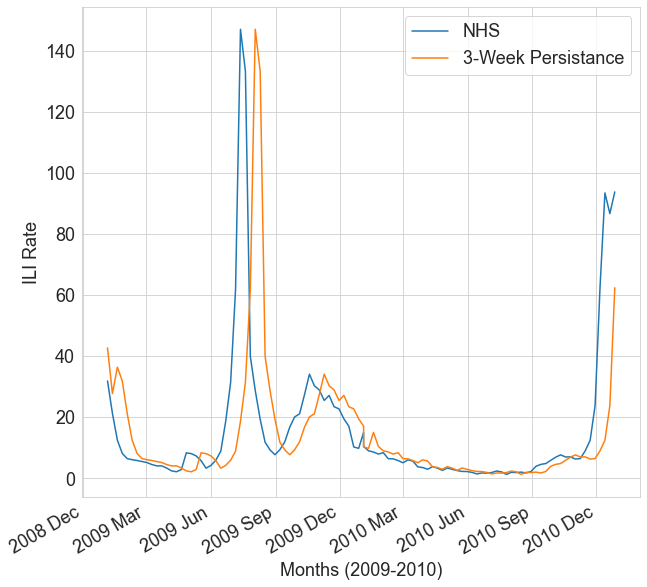

In [22]:
plot_multiple_in_year_range(df, df_with_3week_baseline,
                            year_range=[2009, 2010],
                            labels=["NHS","3-Week Persistance"]
                           )